In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'user_profiles_for_ads.csv'
df = pd.read_csv(file_path)

# Check for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

# Get column information
column_info = df.info()
print("\nColumn Information:\n", column_info)

# Get descriptive statistics
descriptive_stats = df.describe(include='all')
print("\nDescriptive Statistics:\n", descriptive_stats)


Null Values:
 User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                

C:\Users\realh\AppData\Local\Temp\ipykernel_9536\3668098925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age', palette='coolwarm', ax=axes[0, 0])
C:\Users\realh\AppData\Local\Temp\ipykernel_9536\3668098925.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm', ax=axes[0, 1])
C:\Users\realh\AppData\Local\Temp\ipykernel_9536\3668098925.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education Level', palette='coolwarm', ax=axes[1, 0])
C:\Users\realh\AppData\Local\

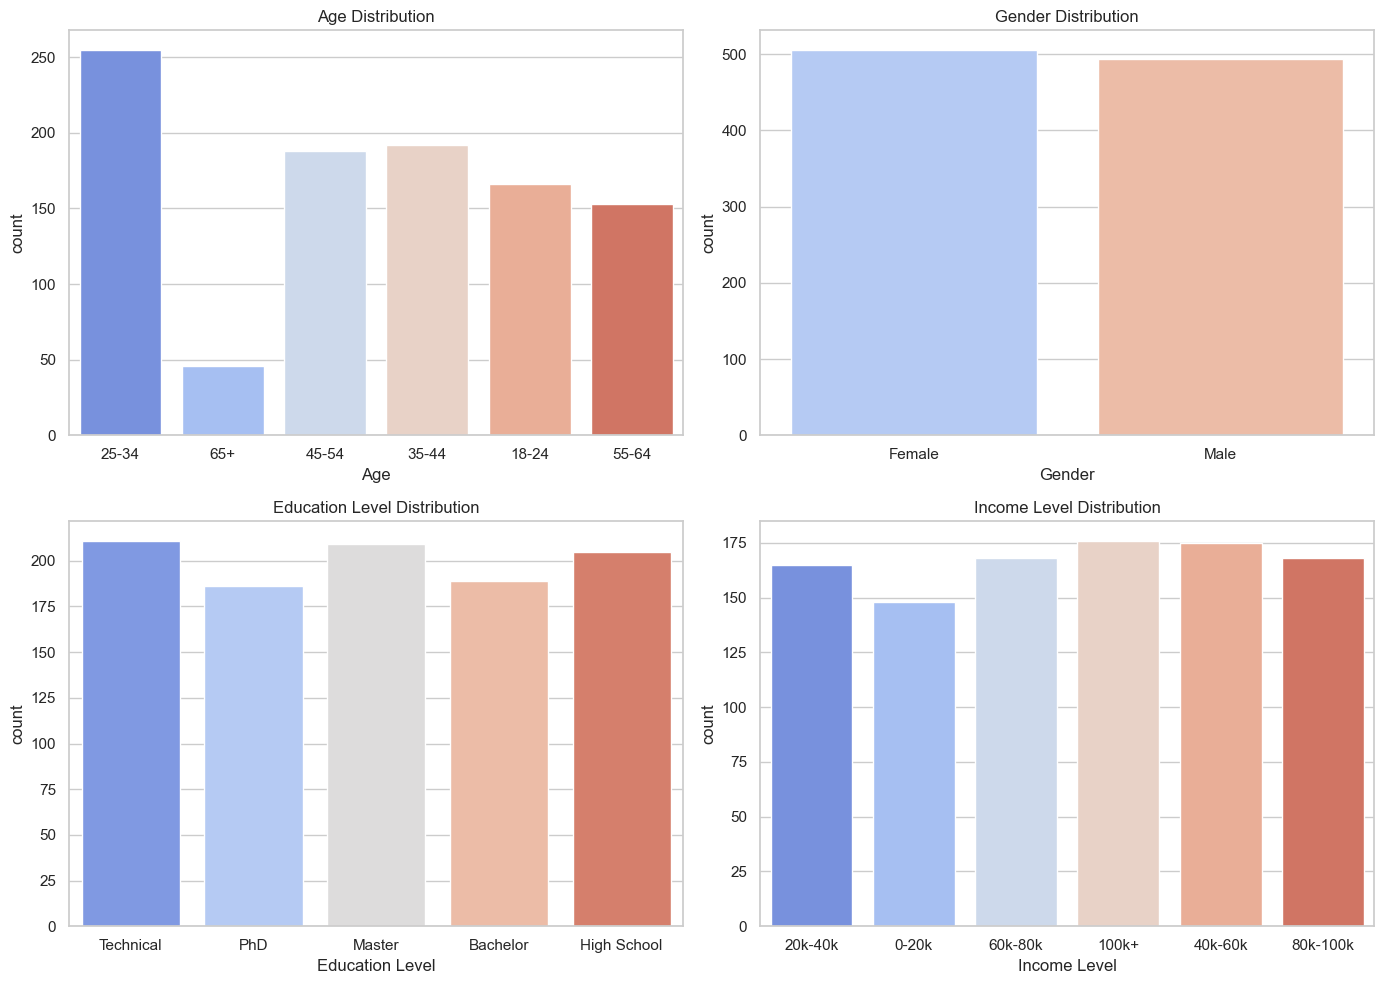

In [16]:


# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age Distribution
sns.countplot(data=df, x='Age', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Gender Distribution
sns.countplot(data=df, x='Gender', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Education Level Distribution
sns.countplot(data=df, x='Education Level', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Education Level Distribution')

# Income Level Distribution
sns.countplot(data=df, x='Income Level', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Income Level Distribution')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\realh\AppData\Local\Temp\ipykernel_9536\1836467980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Device Usage', palette='coolwarm')


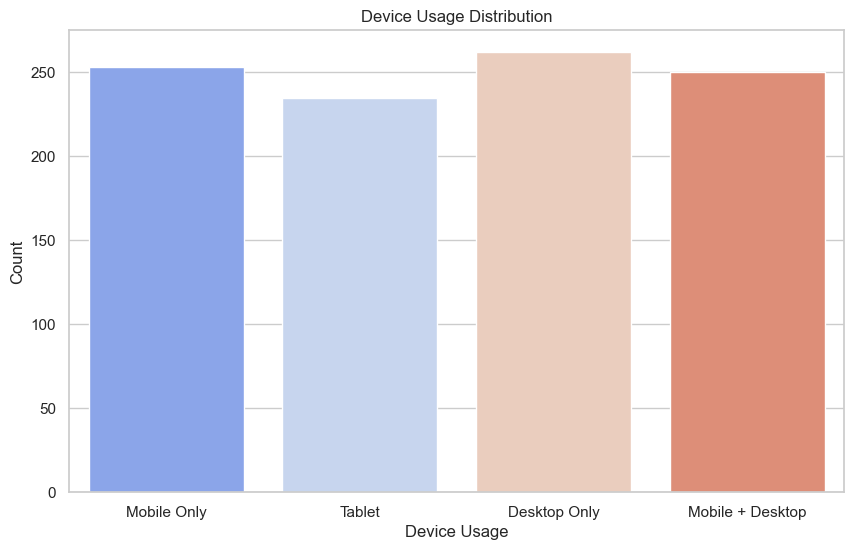

In [17]:


# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for device usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Device Usage', palette='coolwarm')
plt.title('Device Usage Distribution')
plt.xlabel('Device Usage')
plt.ylabel('Count')
plt.show()


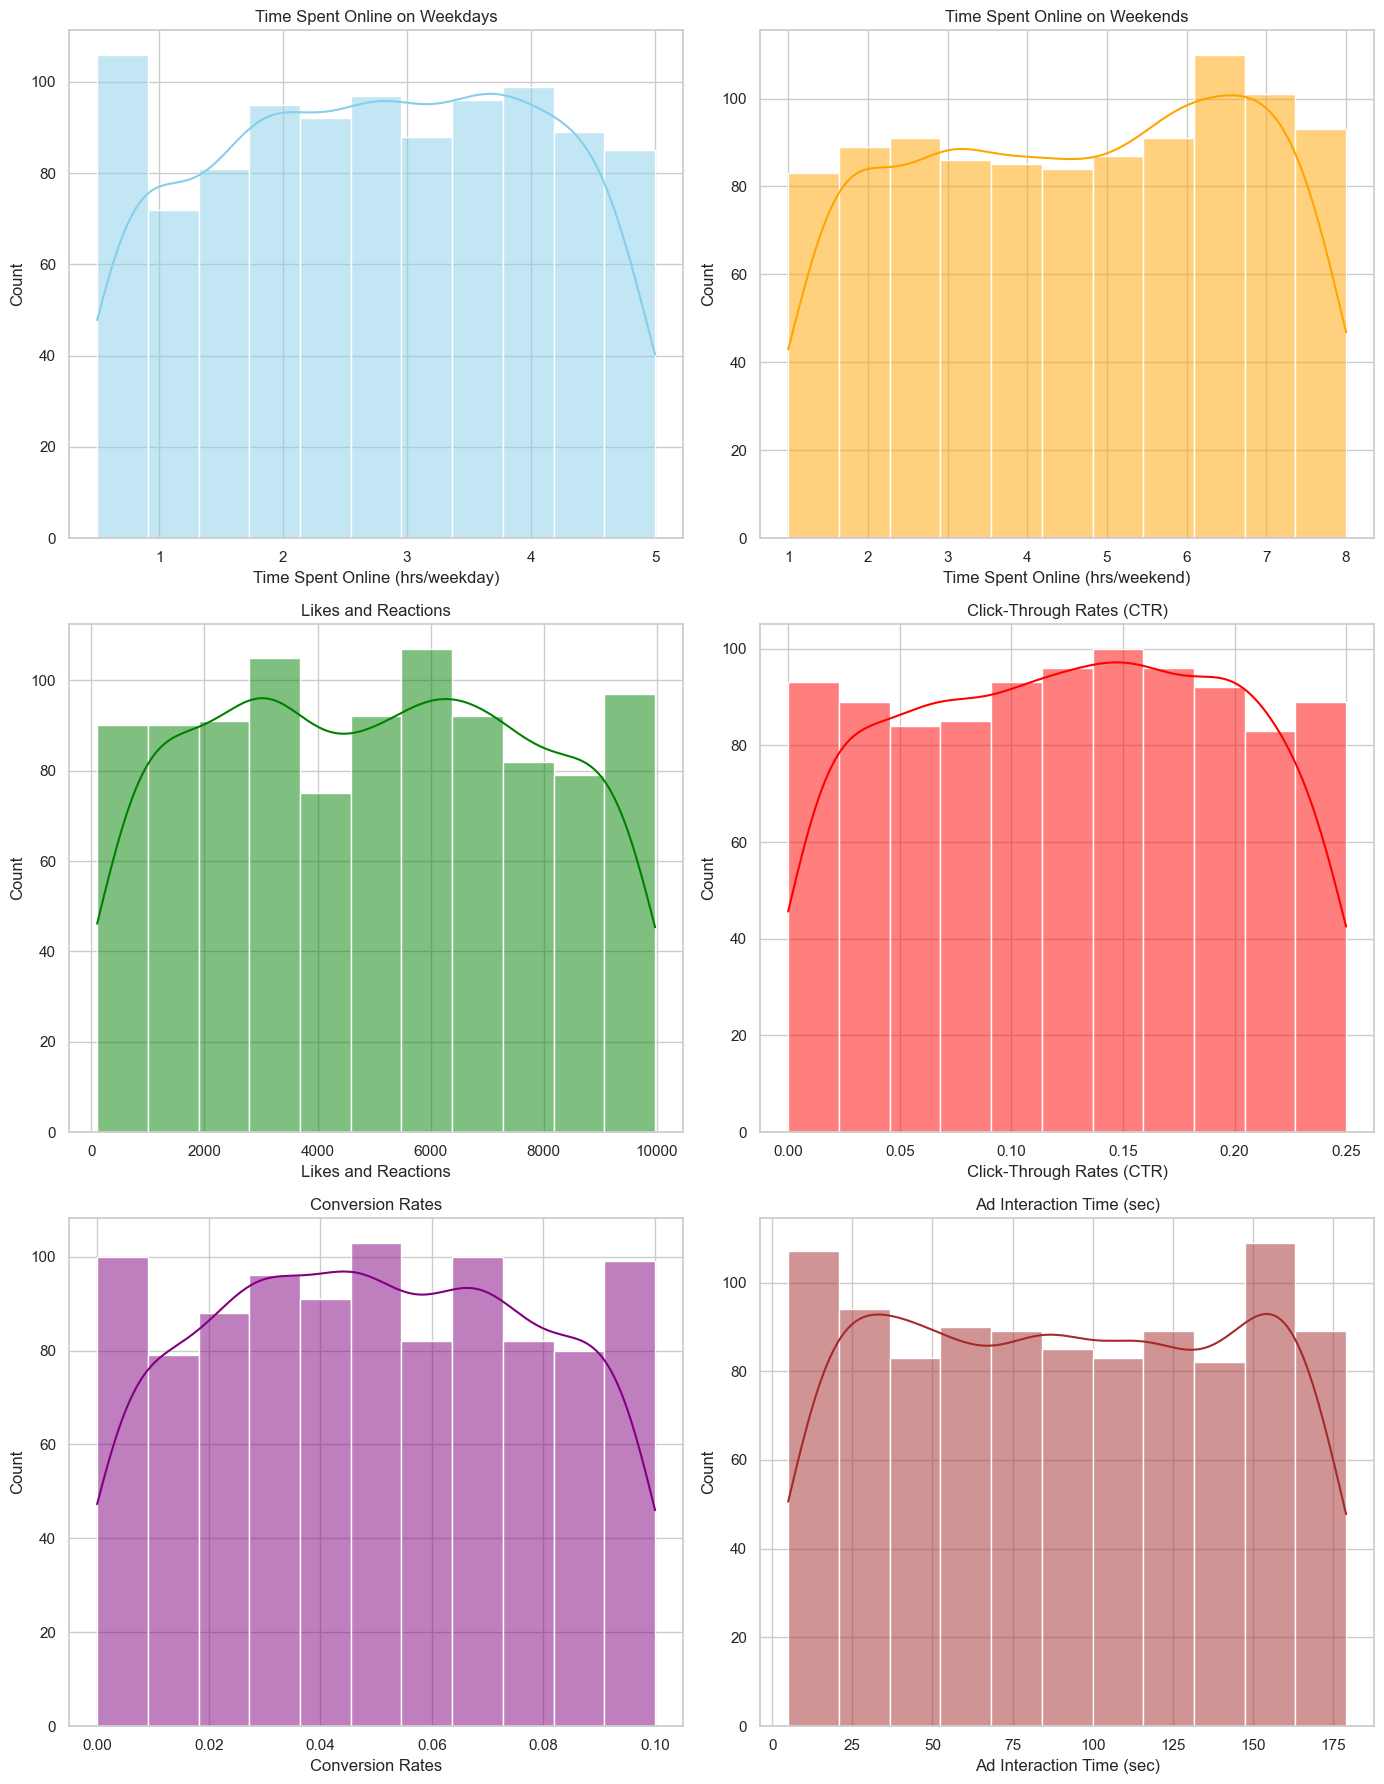

In [18]:


# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Time Spent Online on Weekdays
sns.histplot(df['Time Spent Online (hrs/weekday)'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Time Spent Online on Weekdays')

# Time Spent Online on Weekends
sns.histplot(df['Time Spent Online (hrs/weekend)'], kde=True, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Time Spent Online on Weekends')

# Likes and Reactions
sns.histplot(df['Likes and Reactions'], kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Likes and Reactions')

# Click-Through Rates (CTR)
sns.histplot(df['Click-Through Rates (CTR)'], kde=True, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Click-Through Rates (CTR)')

# Conversion Rates
sns.histplot(df['Conversion Rates'], kde=True, color='purple', ax=axes[2, 0])
axes[2, 0].set_title('Conversion Rates')

# Ad Interaction Time (sec)
sns.histplot(df['Ad Interaction Time (sec)'], kde=True, color='brown', ax=axes[2, 1])
axes[2, 1].set_title('Ad Interaction Time (sec)')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\realh\AppData\Local\Temp\ipykernel_9536\403304574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_interests.index, x=top_interests.values, palette='coolwarm')


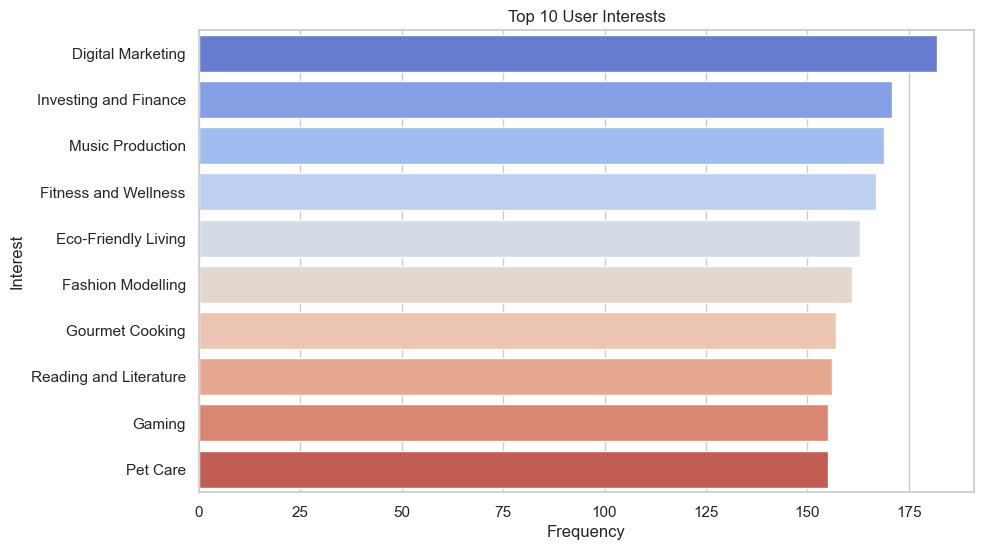

In [19]:


# Extract the top interests from the dataset and count their occurrences
top_interests = df['Top Interests'].str.split(', ').explode().value_counts().head(10)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for the top 10 user interests
plt.figure(figsize=(10, 6))
sns.barplot(y=top_interests.index, x=top_interests.values, palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()


In [20]:


# Select features
features = ['Age', 'Gender', 'Income Level', 'Education Level',
            'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
            'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates']

# Create a copy of the dataframe with only the selected features
df_selected = df[features]

# Preprocess data: one-hot encode categorical features and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
                                   'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates']),
        ('cat', OneHotEncoder(), ['Age', 'Gender', 'Income Level', 'Education Level'])])

# Apply the transformations
df_preprocessed = preprocessor.fit_transform(df_selected)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_preprocessed)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with the cluster labels
df.head()


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,2
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,3
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",4
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",2


In [21]:
# Compute the mean values of the numerical features and the mode for categorical features within each cluster

# Numerical features
numerical_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
                      'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates']

# Categorical features
categorical_features = ['Age', 'Gender', 'Income Level', 'Education Level']

# Compute the mean of numerical features for each cluster
numerical_means = df.groupby('Cluster')[numerical_features].mean()

# Compute the mode of categorical features for each cluster
categorical_modes = df.groupby('Cluster')[categorical_features].agg(lambda x: x.mode()[0])

# Combine the results
cluster_characteristics = pd.concat([numerical_means, categorical_modes], axis=1)

# Display the results
cluster_characteristics


,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Conversion Rates,Age,Gender,Income Level,Education Level
Cluster,,,,,,,,,
0,3.974384,4.550246,2388.221675,0.153399,0.056488,35-44,Female,60k-80k,Master
1,1.748039,4.775980,3708.495098,0.050745,0.061294,25-34,Male,0-20k,High School
2,2.755140,2.678505,7238.504673,0.165575,0.057715,25-34,Male,20k-40k,Technical
3,1.658523,5.746023,4194.659091,0.176659,0.038392,25-34,Male,20k-40k,High School
4,3.510345,5.512808,7233.704433,0.085300,0.033133,25-34,Female,40k-60k,Master


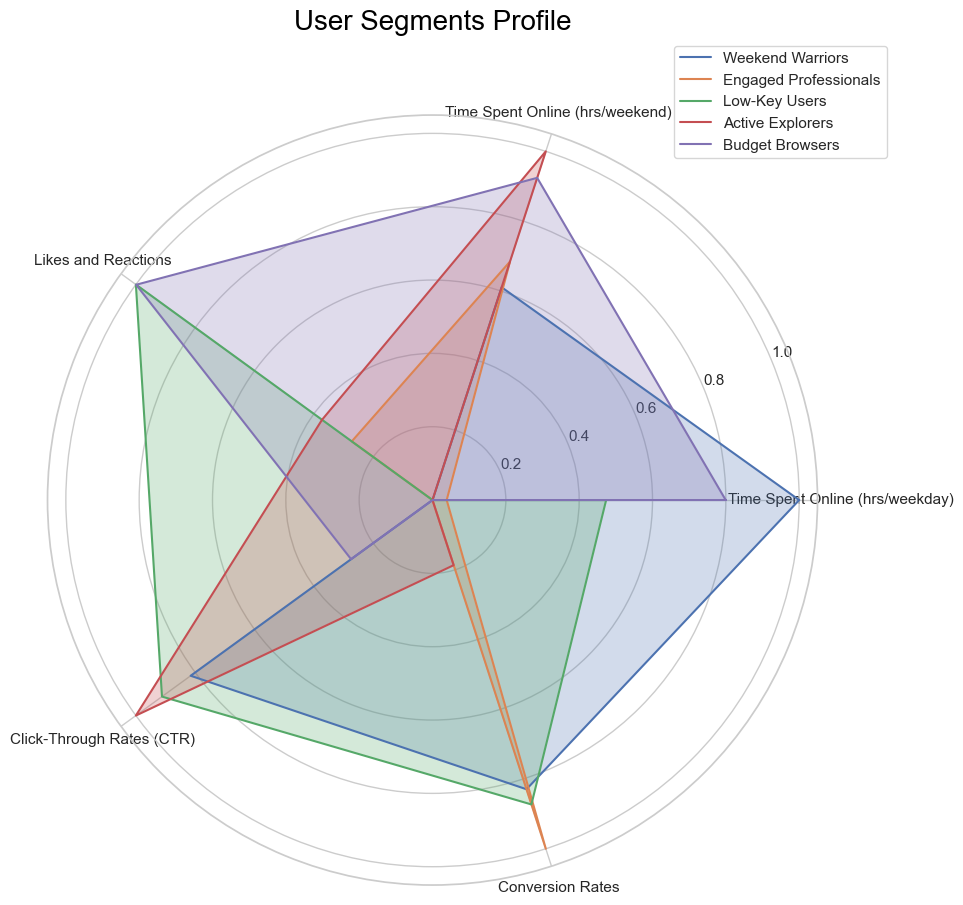

In [22]:



# Define the cluster names
cluster_names = {
    0: "Weekend Warriors",
    1: "Engaged Professionals",
    2: "Low-Key Users",
    3: "Active Explorers",
    4: "Budget Browsers"
}

# Define the features to be used in the radar chart
features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
            'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates']

# Extract the mean values for each cluster
cluster_means = df.groupby('Cluster')[features].mean()

# Normalize the data for better visualization
cluster_means_normalized = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Add cluster names to the normalized data
cluster_means_normalized['Cluster Name'] = cluster_means.index.map(cluster_names)
cluster_means_normalized.set_index('Cluster Name', inplace=True)

# Define the number of variables
num_vars = len(features)

# Compute the angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot close to a circle
angles += angles[:1]

# Create a radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each cluster
for i in range(len(cluster_means_normalized)):
    values = cluster_means_normalized.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cluster_means_normalized.index[i])
    ax.fill(angles, values, alpha=0.25)

# Add labels for each feature
plt.xticks(angles[:-1], features)

# Add a title and legend
plt.title('User Segments Profile', size=20, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()
